In [444]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
plt.style.use('ggplot')

In [445]:
#Transformation
import sklearn
import warnings
warnings.filterwarnings("ignore")
import skopt
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import time
from sklearn import metrics
sns.set()

# I.Data exploration

In [446]:
train = pd.read_csv('xtrain.txt',delimiter = "\t",header=None,index_col=0)
test = pd.read_csv('xtest.txt',delimiter = "\t",header=None,index_col=0)
label= pd.read_csv('ytrain.txt',delimiter = "\t",header=None)
train=train.T
test=test.T
print('rows:', train.shape[0], ', columns:', train.shape[1])
print('rows:', test.shape[0], ', columns:', test.shape[1])
print('rows:', label.shape[0], ', columns:', label.shape[1])

rows: 184 , columns: 4654
rows: 92 , columns: 4654
rows: 184 , columns: 1


In [447]:
train.head(5)

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
1,8.44,7.84,9.23,2.20,4.93,10.31,7.85,9.91,11.37,3.48,...,7.71,11.32,6.37,8.63,8.61,7.42,8.79,4.70,7.23,8.28
2,7.93,8.47,7.77,2.48,6.70,11.03,3.33,9.53,10.91,4.28,...,9.98,10.40,5.96,7.61,9.51,8.20,9.27,4.70,6.70,12.78
3,7.53,7.49,9.49,5.66,5.99,8.87,3.48,8.02,10.73,4.07,...,8.34,10.57,6.92,8.20,8.71,8.56,8.90,4.70,7.70,12.22
4,7.72,8.38,8.03,5.22,6.95,2.73,4.06,9.26,10.90,7.40,...,9.05,10.92,5.73,8.44,9.18,7.86,9.30,5.58,7.95,12.18
5,7.89,7.75,6.99,2.20,7.06,11.38,3.65,9.22,10.37,3.89,...,9.16,10.73,7.45,7.79,9.15,7.97,8.50,4.70,6.63,12.12


In [448]:
#train_Gen.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 184
Columns: 4654 entries, x10006_at to x9_at
dtypes: float64(4654)
memory usage: 6.5 MB


In [449]:
####### Number of missing data ########
train.isnull().sum().sum()


0

In [450]:
train.describe()

,x10006_at,x10007_at,x100129361_at,x100130449_at,x100130633_at,x100133941_at,x10014_at,x10016_at,x100188893_at,x10019_at,...,x9976_at,x9978_at,x997_at,x9984_at,x9987_at,x9988_at,x9989_at,x9994_at,x9997_at,x9_at
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,8.177011,8.061848,8.200543,2.879457,6.999783,10.059457,3.839783,9.201739,10.927228,4.749837,...,9.038261,11.070870,5.862935,8.049728,9.535272,8.427446,9.180272,5.161576,7.427174,8.157935
std,0.646031,0.481127,0.750500,1.372735,0.778613,1.825424,0.634312,0.742043,0.415874,1.050290,...,1.412595,0.501227,1.050994,0.633328,0.424735,0.620824,0.677722,0.733061,0.945051,3.606550
min,6.210000,6.490000,5.860000,2.190000,3.710000,2.730000,2.940000,7.110000,9.970000,2.510000,...,3.780000,9.820000,3.360000,5.750000,8.460000,6.700000,6.350000,4.450000,3.840000,2.480000
25%,7.790000,7.757500,7.802500,2.200000,6.605000,9.502500,3.440000,8.735000,10.670000,4.055000,...,8.485000,10.737500,5.327500,7.647500,9.270000,8.037500,8.842500,4.700000,6.847500,4.475000
50%,8.105000,8.055000,8.190000,2.200000,7.030000,10.300000,3.730000,9.235000,10.920000,4.575000,...,9.260000,11.070000,5.790000,8.085000,9.570000,8.460000,9.245000,4.790000,7.475000,8.695000
75%,8.582500,8.350000,8.610000,2.792500,7.492500,11.030000,4.062500,9.592500,11.200000,5.252500,...,9.992500,11.422500,6.450000,8.442500,9.832500,8.805000,9.625000,5.310000,8.082500,11.522500
max,10.000000,9.710000,10.910000,9.490000,8.890000,13.540000,7.850000,12.820000,12.840000,8.550000,...,11.350000,12.230000,8.640000,9.720000,10.730000,10.330000,11.120000,8.510000,9.750000,13.380000


In [451]:
# Now lets check the class distributions
labels=np.array(label)
N,D = label.shape
positive=0
negative=0
for i in range(N):
    if labels[i]== 1:
        positive+=1
    else :
        negative+=1
classP =positive /N
classN= negative/N
print(' Class 1 percentage: %{:2f}'.format(100*classP))
print('Class -1 percentage: %{:2f}'.format(100*classN))

 Class 1 percentage: %35.869565
Class -1 percentage: %64.130435


## II.Features Choosing

In [ ]:
Here , we try features selection using PCA and Lasso
And We get better performance by using the features select by LASSO method

In [452]:
# corr = train.corr()
# plt.subplots(figsize=(30, 30))
# cmap = sns.diverging_palette(150, 350, as_cmap=True)
# sns.heatmap(corr, cmap="RdYlBu", vmax=15, vmin=0.6, center=0.1,\
#             square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [453]:
# from intertools import combinaisons
# from sklearn.preprocessing import PolynomialFeatures

# def add_interactions(data):
#     #get features names
#     comb=list(combinaisons(list(data.columns),2))


## 1.Features reduction with PCA

In [454]:
# dimentionality reduction
from sklearn.decomposition import PCA

pca = PCA(0.95) # to get the independent representation


In [455]:
from sklearn.preprocessing import normalize, Normalizer
train_norm=normalize(train)
test_norm=normalize(train)
train_pca_select=pca.fit_transform(train_norm)
test_pca_select=pca.fit_transform(test_norm)

In [456]:
train.shape,train_pca_select.shape

((184, 4654), (184, 134))

## 2.Using Lasso to degenerate the parameters

In [457]:

from sklearn.linear_model import Lasso

lass = Lasso(
        max_iter=3000,
        alpha= 0.000281,
        random_state= 5 
        )
lass.fit(train,label)
lass.coef_.min(), lass.coef_.max()

(-0.14313772871031608, 0.19779700998376284)

### Lasso features importances

Text(0.5,1,'Coefficients in the Lasso Model')

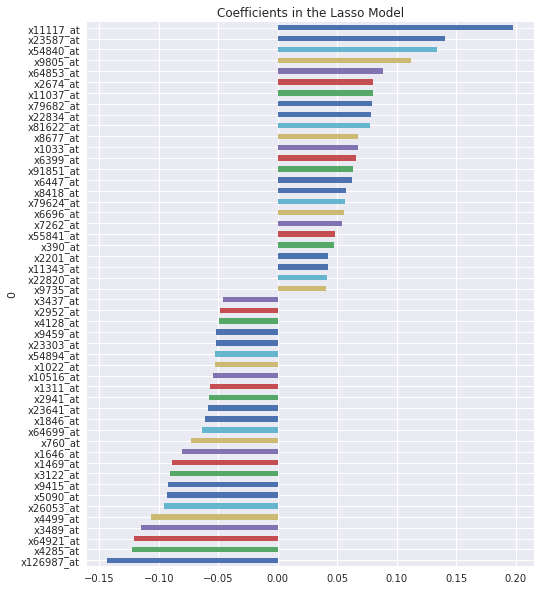

In [526]:
import matplotlib
coef = pd.Series(lass.coef_, index = train.columns)
#print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


imp_coef = pd.concat([coef.sort_values().head(25),
                     coef.sort_values().tail(25)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [512]:
good_feats = np.abs(np.array(lass.coef_)) > 0

print("Features reduced from %10d to %10d" % (train_norm.shape[1], int(good_feats.sum())))

Features reduced from       4654 to        242


In [460]:
train_lasso_select = train.iloc[:, good_feats]
test_lasso_select= test.iloc[:, good_feats]
train_lasso_select.to_csv('train_lasso_select.csv',index=False)
test_lasso_select.to_csv('test_lasso_select.csv',index=False)

## 3.Using XGBooster to plot importance

In [521]:
from xgboost import XGBClassifier,plot_importance
model = XGBClassifier(max_depth=5,n_estimators=1000,learning_rate=1e-2)
model.fit(train,label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

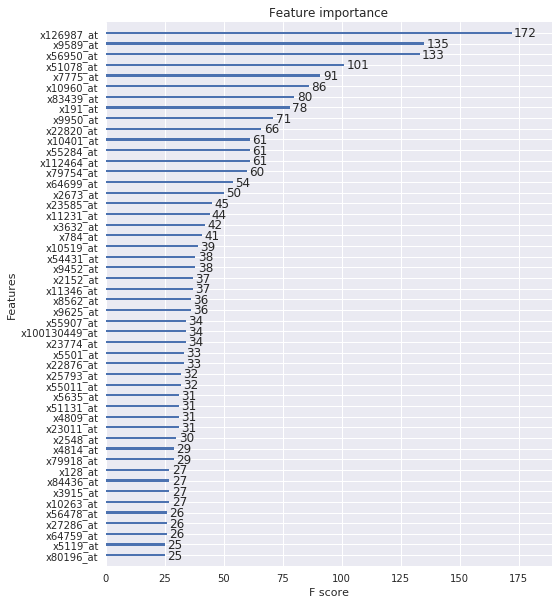

In [524]:
plot_importance(model,max_num_features=50)
plt.show()

LASSO give better performance with the following models

# Modeling 



## 1. Overview of some Classication Models
     Here i test the following models with default parameter

    Linear SVM
    Non linear SVM
    Logistic Regression
    Random Forest
    XGBoost Classifier
   

In [461]:
#scikit imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
#classifiers
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import Matern
from sklearn.ensemble import VotingClassifier
#Transformation
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

#### Assessing model performance
    Randomly split data into trains/tests sets
    Build model on train set and assess performance on test set
    Use  AUC of ROC performance  mettrics 

In [462]:
#Splitting data into training and validation set
np.random.seed(90)
x_train, x_test, y_train, y_test = train_test_split(train_lasso_select,label,test_size = 0.20, shuffle=True)

In [463]:
#Data transformation with mean 0 and SD 1.
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)


# 1.Linear SVM

In [464]:
#np.random.seed(5)

In [465]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,auc,roc_curve
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
#Models for test
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold


In [466]:
#SVM = LinearSVC(penalty='l2',loss='hinge',C=10)
SVM = LinearSVC()
SVM.fit(x_train,y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [467]:
predictions = SVM.predict(x_test)
confusion_matrix(y_test, predictions)

array([[19,  1],
       [ 0, 17]])

In [468]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

         -1       1.00      0.95      0.97        20
          1       0.94      1.00      0.97        17

avg / total       0.97      0.97      0.97        37



In [469]:
SVM_accur = sklearn.model_selection.cross_val_score(SVM, 
                                        x_train, y_train, 
                                        scoring='accuracy',cv=5)

print(SVM_accur.mean())

0.9257471264367816


In [470]:
SVM.score(x_test,y_test)

0.972972972972973

In [411]:
# test_scoreSVM=SVM.fit(x_train, y_train).decision_function(x_test)
# # x,y,_=roc_curve(y_test, test_scoreSVM)

In [529]:
# score of prediction 
y_scoreSVM = SVM.fit(x_train, y_train).decision_function(test_lasso_select)


(37, 1)

#### Area under ROC curve for SVM

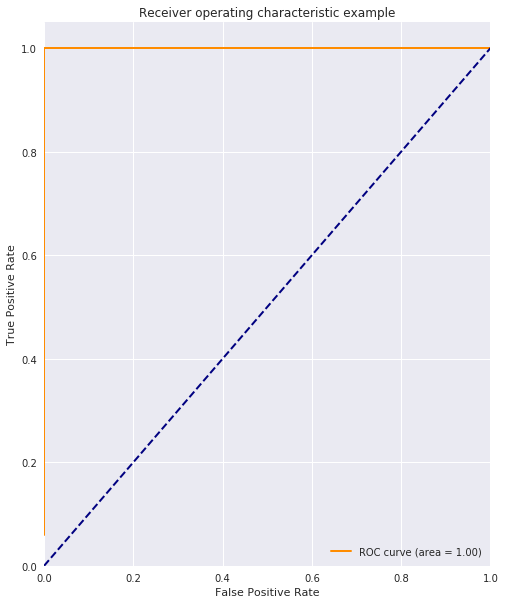

In [540]:
y_score = SVM.fit(x_train, y_train).decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr,reorder=False)
roc_auc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 2.Non linear SVM

In [413]:
from sklearn.svm import SVC

In [563]:
KSVM=SVC()
KSVM.fit(x_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [564]:
pred_KSVM = KSVM.predict(x_test)
confusion_matrix(y_test, pred_KSVM)

array([[20,  0],
       [14,  3]])

In [565]:
print(classification_report(y_test,pred_KSVM))

             precision    recall  f1-score   support

         -1       0.59      1.00      0.74        20
          1       1.00      0.18      0.30        17

avg / total       0.78      0.62      0.54        37



In [566]:
KSVM_accur = sklearn.model_selection.cross_val_score(KSVM, 
                                        x_train, y_train, 
                                        scoring='accuracy',cv=5)

print(KSVM_accur.mean())

0.6667487684729064


In [549]:
KSVM.score(x_test,y_test)

0.6216216216216216

In [550]:
# score of prediction 
y_scoreKSVM = KSVM.fit(x_train, y_train).decision_function(test_lasso_select)

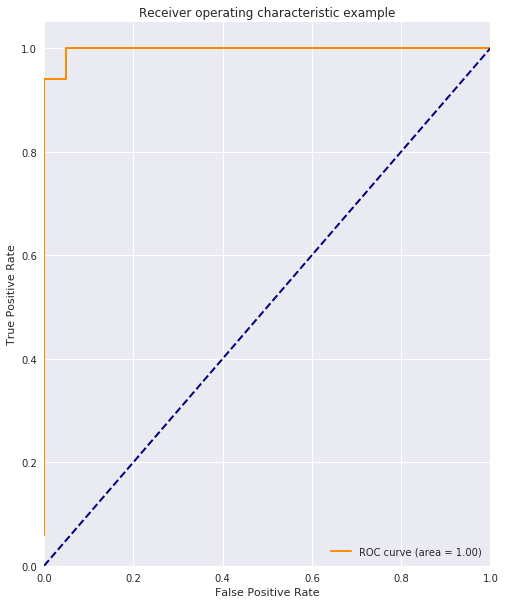

In [552]:
y_score_KSVM = KSVM.fit(x_train, y_train).decision_function(x_test)
fpr_ksvm, tpr_ksvm, _ = roc_curve(y_test, y_score_log)
roc_auck = auc(fpr_ksvm, tpr_ksvm,reorder=False)
roc_auc
plt.figure()
lw = 2
plt.plot(fpr_ksvm, tpr_ksvm, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auck)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 3.Logistic Regression

In [420]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [421]:
LR_accur = sklearn.model_selection.cross_val_score(LR, 
                                        x_train, y_train, 
                                        scoring='accuracy',cv=5)

print(LR_accur.mean())

0.9188341543513957


In [422]:
LR.score(x_test, y_test)

0.972972972972973

In [423]:
pred_LR = LR.predict(x_test)
confusion_matrix(y_test, pred_LR)

array([[19,  1],
       [ 0, 17]])

In [424]:
print(classification_report(y_test, pred_LR))

             precision    recall  f1-score   support

         -1       1.00      0.95      0.97        20
          1       0.94      1.00      0.97        17

avg / total       0.97      0.97      0.97        37



In [349]:
# score of prediction 
y_scoreLR = LR.fit(x_train, y_train).decision_function(test_lasso_select)


(92,)

#### Area under ROC curve for SVM

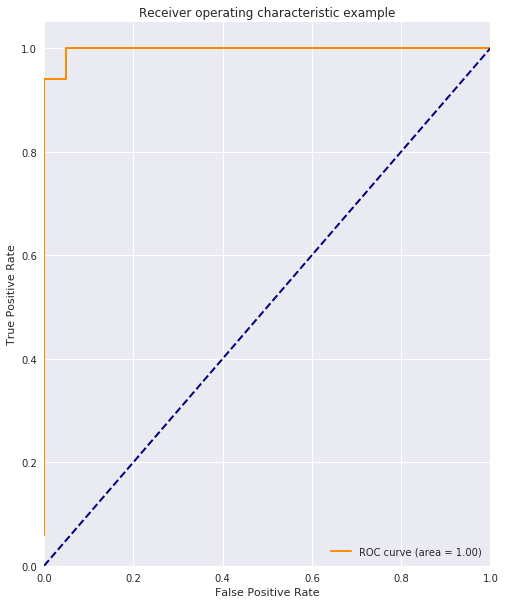

In [544]:
y_score_log = LR.fit(x_train, y_train).decision_function(x_test)
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_log)
roc_auc = auc(fpr_lg, tpr_lg,reorder=False)
roc_auc
plt.figure()
lw = 2
plt.plot(fpr_lg, tpr_lg, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 4.Random Forest

In [222]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [223]:
pred_RF = RF.predict(x_test)
confusion_matrix(y_test, pred_RF)

array([[20,  0],
       [11,  6]])

In [224]:
print(classification_report(y_test, pred_RF))

             precision    recall  f1-score   support

         -1       0.65      1.00      0.78        20
          1       1.00      0.35      0.52        17

avg / total       0.81      0.70      0.66        37



In [225]:
RF_accur = sklearn.model_selection.cross_val_score(RF, 
                                        x_train, y_train, 
                                        scoring='accuracy',cv=5)

print(RF_accur.mean())

0.6477011494252874


In [226]:
RF.score(x_test,y_test)

0.7027027027027027

In [304]:
# score of prediction 
#y_scoreRF = RF.fit(x_train, y_train).decision_function(test_lasso_select)

# 5.XGBoost Classifier

In [228]:
model_xgbc = XGBClassifier()
model_xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [121]:
model_xgbc_accur = sklearn.model_selection.cross_val_score(model_xgbc, 
                                        x_train, y_train, 
                                        scoring='accuracy',cv=5)
#print(model_xgbc_accur)
print(model_xgbc_accur.mean())

0.6748275862068965


In [122]:
model_xgbc_pred = model_xgbc.predict(x_test)
model_xgbc_accur_pred = metrics.accuracy_score(y_test, model_xgbc_pred)
print(model_xgbc_accur_pred)

0.5945945945945946


In [123]:
pred_xgb = model_xgbc .predict(x_test)
confusion_matrix(y_test, pred_xgb)

array([[19,  1],
       [14,  3]])

In [124]:
print(classification_report(y_test, pred_xgb))

             precision    recall  f1-score   support

         -1       0.58      0.95      0.72        20
          1       0.75      0.18      0.29        17

avg / total       0.66      0.59      0.52        37



In [471]:
# score of prediction 
#y_scorexgbc = model_xgbc.fit(x_train, y_train).decision_function(test_lasso_select)

# 6.SGD Classifier

In [478]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc = sgdc.fit(x_train, y_train)
print("\n Training score: ",sgdc.score(x_train,y_train)) #evaluating the training error
pred = sgdc.predict(x_test)
score = metrics.accuracy_score(pred,y_test)
print("\nThe accuracy score that we get is: ",score)



 Training score:  0.9795918367346939

The accuracy score that we get is:  0.8108108108108109


In [479]:
print("Confusion Matrix: ")
confusion_matrix(y_test, pred)

Confusion Matrix: 


array([[17,  3],
       [ 4, 13]])

In [480]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

         -1       0.81      0.85      0.83        20
          1       0.81      0.76      0.79        17

avg / total       0.81      0.81      0.81        37



In [484]:
#score of prediction 
y_scoreSGD = sgdc.fit(x_train, y_train).decision_function(test_lasso_select)

## 7.Gradient Boosting Classifier

In [489]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=5)
GBC = GBC.fit(x_train,y_train)
print("\n Training score: ",GBC.score(x_train,y_train)) #evaluating the training error
predGBC = GBC.predict(x_test)
score = metrics.accuracy_score(predGBC,y_test)
print("\nThe accuracy score that we get is: ",score)



 Training score:  1.0

The accuracy score that we get is:  0.6486486486486487


In [490]:
print("Confusion Matrix: ")
confusion_matrix(y_test, predGBC)

Confusion Matrix: 


array([[20,  0],
       [13,  4]])

In [491]:
print(classification_report(y_test, predGBC))

             precision    recall  f1-score   support

         -1       0.61      1.00      0.75        20
          1       1.00      0.24      0.38        17

avg / total       0.79      0.65      0.58        37



## 8.Ada Boost Classifier

In [495]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=5)
ABC = ABC.fit(x_train,y_train)
print("\n Training score: ",ABC.score(x_train,y_train)) #evaluating the training error
predABC = ABC.predict(x_test)
score = metrics.accuracy_score(predABC,y_test)
print("\nThe accuracy score that we get is: ",score)


 Training score:  1.0

The accuracy score that we get is:  0.7027027027027027


In [496]:
print("Confusion Matrix: ")
confusion_matrix(y_test, predABC)

Confusion Matrix: 


array([[16,  4],
       [ 7, 10]])

In [497]:
print(classification_report(y_test, predABC))

             precision    recall  f1-score   support

         -1       0.70      0.80      0.74        20
          1       0.71      0.59      0.65        17

avg / total       0.70      0.70      0.70        37



In [498]:
#score of prediction 
y_scoreABC = ABC.fit(x_train, y_train).decision_function(test_lasso_select)